# 1. DB에서 데이터 불러오기

In [23]:
import database_bw
import bw_class
# ddddddddddddddddddddddddddddddddddddddddd

In [24]:
database.csv2db()

csv to db


In [25]:
train = database_bw.making_dataframe_train_db('train_table')
test = database_bw.making_dataframe_test_db('test_table')

In [26]:
# bw_class 적용1
bw = bw_class.bw_preprocessing(train) #ddds
bw.apply_my_function()
bw_df = bw.return_dataframe()

In [27]:
# bw_class 적용2
processor = bw_class.RFMProcessor(train)
rfm_without_outliers, rfm_outliers, rfm_without_outliers_log, X_scaled = processor.process_data()

In [28]:
# 적용
processor = bw_class.RFMProcessor(train) 
rfm_without_outliers, rfm_outliers, rfm_without_outliers_log, X_scaled = processor.process_data()
processor.fit_clustering(X_scaled, n_clusters=4)
new_data_predictions = processor.predict(train)

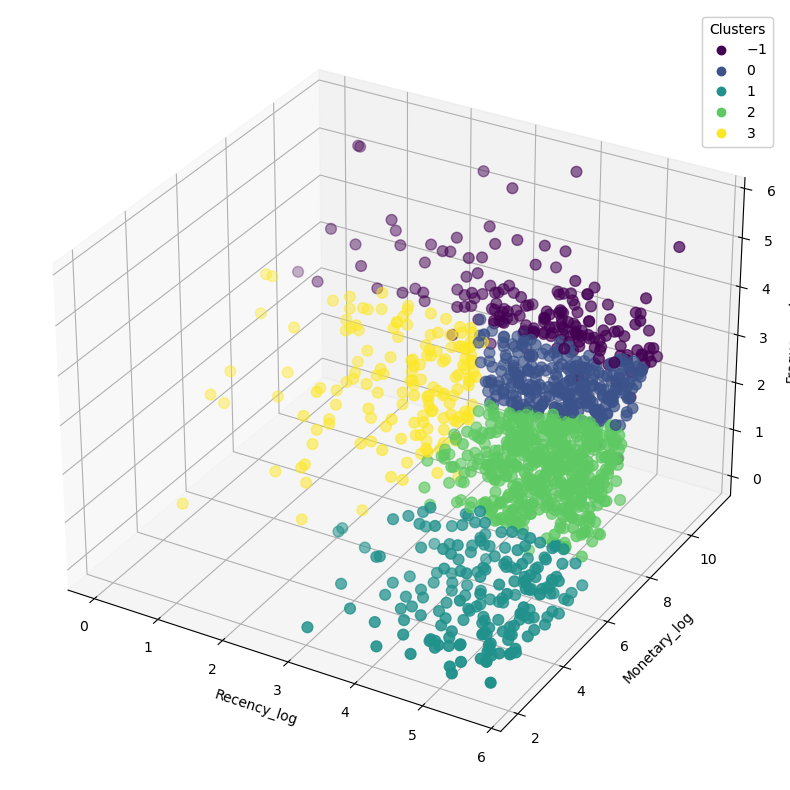

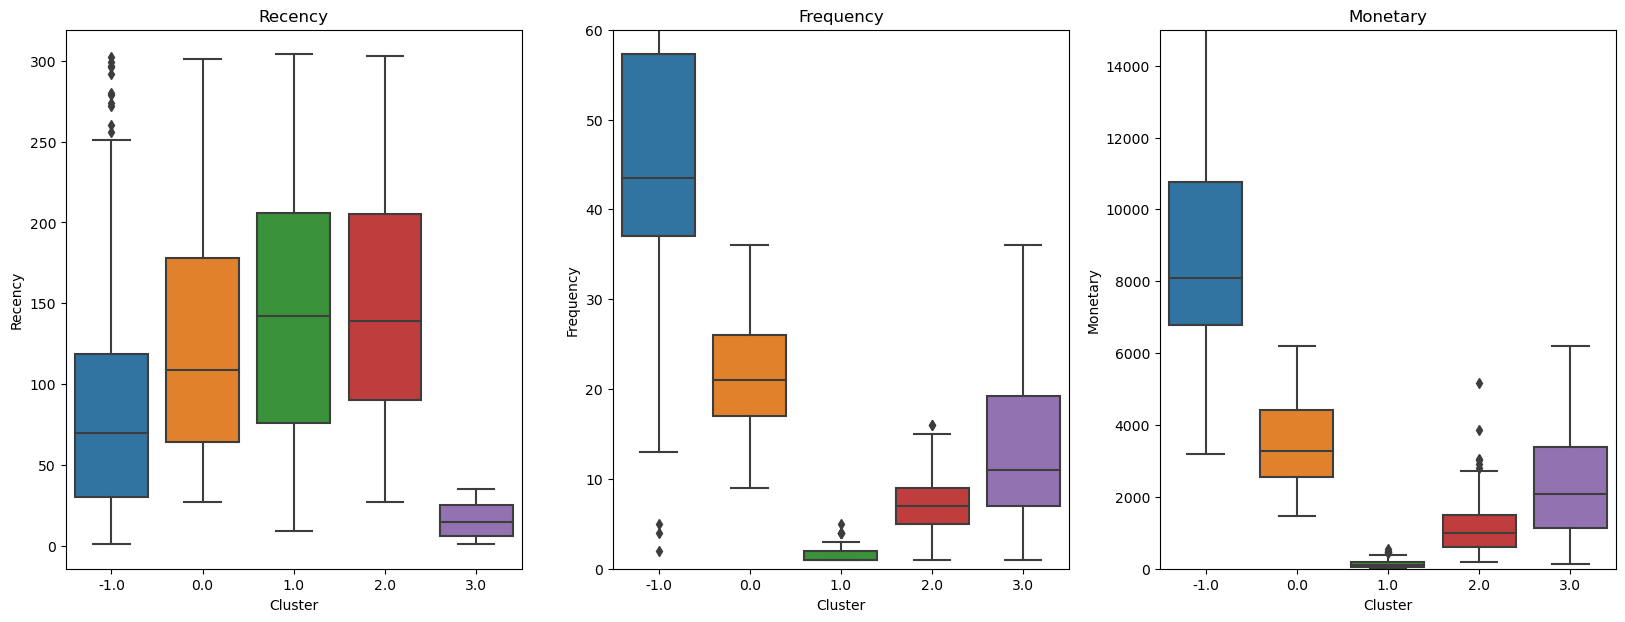

In [29]:
visualization = bw_class.Visualization(new_data_predictions)
visualization.plot_clusters(new_data_predictions["Cluster"])
visualization.plot_boxplots()

In [30]:
cluster_data = bw_class.mapping_cluster(new_data_predictions)
cluster = cluster_data[['고객ID', '고객분류']]

In [31]:
train_bw = bw_df.merge(cluster, on = '고객ID', how = 'left')

In [32]:
database_bw.create_new_table(train_bw, 'train_bw')



Existing table 'train_bw' dropped, and new table is created


In [33]:
train_bw = database_bw.making_dataframe_our_db('train_bw')